# Gráficos usando el esquema propuesto


![data_model.jpg](images_db/data_model.jpg)

In [28]:
# Importar librerías

import pandas as pd
import seaborn as sns
import matplotlib.pyplot
from sqlalchemy import create_engine
import sqlite3



<AxesSubplot:xlabel='type', ylabel='average_runtime'>

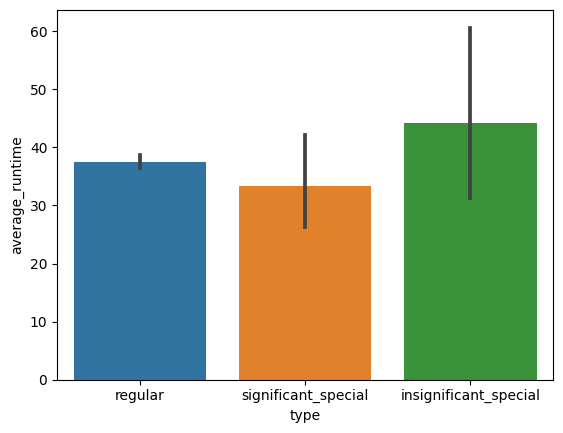

In [81]:
# SQLite
engine = create_engine('sqlite:///database.db', echo=False)

df = pd.read_sql_query('''select type, runtime as average_runtime from schedule''', con = engine)

sns.barplot(data=df, x="type", y="average_runtime")

<AxesSubplot:>

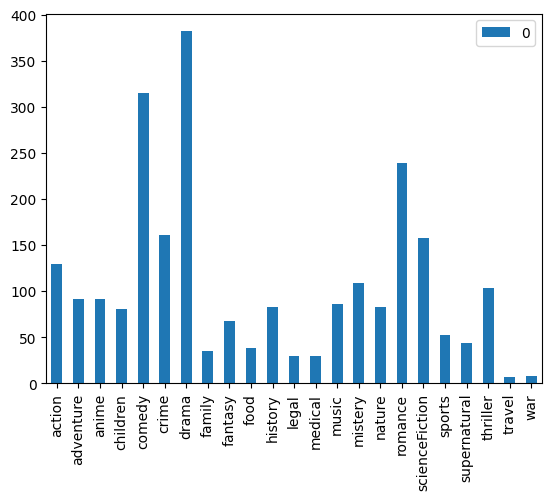

In [87]:
df = pd.read_sql_query('''WITH main as (
                        SELECT "show.id", max(Action) as action, max(Adventure) as adventure, max(Anime) as anime,
                          max(Children) as children, max(Comedy) as comedy, max(Crime) as crime,
                          max(Drama) as drama, max(Family) as family, max(Fantasy) as fantasy, max(Food) as food, 
                          max(History) as history, max(Legal) as legal, max(Medical) as medical, max(Music) as music, 
                          max(Mystery) as mistery, max(Nature) as nature, max(Romance) as romance, max("Science-Fiction") as scienceFiction, 
                          max(Sports) as sports, max(Supernatural) as supernatural, max(Thriller) as thriller, max(Travel) as travel, 
                          max(War) as war
                        FROM shows_categories
                        GROUP BY "show.id"
                        )
                        SELECT sum(Action) as action, sum(Adventure) as adventure, sum(Anime) as anime,
                          sum(Children) as children, sum(Comedy) as comedy, sum(Crime) as crime,
                          sum(Drama) as drama, sum(Family) as family, sum(Fantasy) as fantasy, sum(Food) as food,
                          sum(History) as history, sum(Legal) as legal, sum(Medical) as medical, sum(Music) as music, 
                          sum(mistery) as mistery, sum(Nature) as nature, sum(Romance) as romance, sum("scienceFiction") as scienceFiction, 
                          sum(Sports) as sports, sum(Supernatural) as supernatural, sum(Thriller) as thriller, sum(Travel) as travel, 
                          sum(War) as war
                        FROM main
        ''', con=engine)
df.T.plot.bar()

<AxesSubplot:xlabel='series', ylabel='countries'>

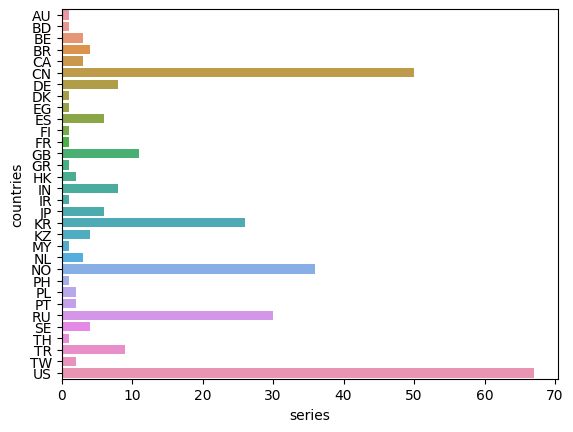

In [111]:
df = pd.read_sql_query('''SELECT "show.webChannel.country.code" as countries, COUNT(DISTINCT "show.id") as series
                          FROM shows
                          GROUP BY 1
                        ''', con=engine)
sns.barplot(data=df, x="series", y="countries")